In [1]:
import numpy as np
import csv
import time as t
import matplotlib.pylab as plt

## Code of my implementation using ```Graph2```

Some useful functions

In [2]:
def linear_sort(arr):
    """
    This method sorts a list of integers in linar time, using the list count which has the length of the max of the list
    """
    n = len(arr)
    count = [0] * (max(arr) + 1)
    for i in range(n):
        count[arr[i]] += 1
    sorted_list = []
    for i in range(len(count)):
        for j in range(count[i]):
            sorted_list.append(i)

    return sorted_list

def getNumberRows(filename):
    with open(filename, 'r') as file:
        csvreader = csv.reader(file)
        number = 0
        for row in csvreader:
            number += 1
    return number

### Class ```ChainedList```, ```NodeChainedList```

Creation of the class ```ChainedList``` and ```NodeChainedList```

The ```NodeChainedList``` class represents a node in a doubly-linked list, with an object, a reference to its father node, and a reference to its child node. It has methods for setting and getting its father and child nodes, setting and getting its object, and removing itself from the list.

The ```ChainedList``` class represents a doubly-linked list, with a reference to the root node. It has methods for adding a root node, adding a leaf node, getting all elements in the list, and getting all elements in the list with more details.

In [3]:
class NodeChainedList:
    def __init__(self, object):
        self.object = object
        self.father = None
        self.child = None
        return
    
    def setFather(self, node): #Set the father of the current node
        self.father = node
        return

    def setChild(self, node): #Set the child of the current node
        self.child = node
        return
    
    def setAfter(self,node): #Set the current node after the given node
        child = node.getChild()
        if child != None:
            child.setFather(self)
            self.child = child
        node.setChild(self)
        self.father = node
        return

    def setBefore(self, node): #Set the current node before the given node
        father = node.getFather()
        if father != None:
            father.setChild(self)
            self.father = father
        node.setFather(self)
        self.child = node
        return

    def getObject(self): #Get the object of the current node
        return self.object

    def setObject(self, object): #Set the object of the current node
        self.object = object

    def getChild(self): # Get the child of the current node
        return self.child

    def getFather(self): #Get the father of the current node
        return self.father
    
    def remove(self): #Remove the current node from the list
        father = self.father
        child = self.child
        if father != None:
            father.setChild(child)
        if child != None:
            child.setFather(father)
        self.father = None
        self.child = None

class ChainedList:
    def __init__(self):
        self.root = None
        return

    def addRoot(self,node:NodeChainedList): #Add a root node to the list
        self.root = node
        return

    def getAllElements(self): #Get all elements in the list
        res = []
        node = self.root
        res.append(node.getObject())
        i = 0
        while node.getChild() != None and i < 1000:
            node = node.getChild()
            res.append(node.getObject())
            i+=1
        return res
    
    def getAllElementsDetail(self): #Get all elements with detail about the father and the child in the list
        res = []
        node = self.root
        if node.getFather() != None:
            if node.getChild()!=None:
                res.append([node.getObject(), node.getFather().getObject(), node.getChild().getObject()])
            else:
                res.append([node.getObject(), node.getFather().getObject(), node.getChild()])
        else:
            if node.getChild()!=None:
                res.append([node.getObject(), node.getFather(), node.getChild().getObject()])
            else:
                res.append([node.getObject(), node.getFather(), node.getChild()])
        i = 0
        while node.getChild() != None and i < 10:
            node = node.getChild()
            if node.getFather() != None:
                if node.getChild()!=None:
                    res.append([node.getObject(), node.getFather().getObject(), node.getChild().getObject()])
                else:
                    res.append([node.getObject(), node.getFather().getObject(), node.getChild()])
            else:
                if node.getChild()!=None:
                    res.append([node.getObject(), node.getFather(), node.getChild().getObject()])
                else:
                    res.append([node.getObject(), node.getFather(), node.getChild()])
            i+=1
        return res

### Class ```Graph2```

This code defines a class Graph2, which represents a graph structure. It has several methods for creating a graph from a CSV file, including options to limit the number of rows used to create the graph. The class uses a doubly-linked list (ChainedList class) and an adjacency list to store the graph's data.
It has the following properties:

    - adjacencyList
    - chainedList: an instance of the ChainedList class, used to store the graph's data as a doubly-linked list
    - firstVertexChainedList
    - vertexReference: a dictionary that stores the reference of each vertex in the chainedList
    - adjacencyListPointers: a list of pointers to the adjacency list, used for faster access
    - nb_vertex: the number of vertices in the graph
    - nb_edges: the number of edges in the graph

The class has several static methods, including createAdjacencyListPointers, createAdjacencyList, and createChainedList, which are used to create and initialize the properties of the class.

The fromCsv and fromCsvLimitRow methods are used to create a graph object from a CSV file, it reads the CSV file, creates an adjacency list and a chained list from the data, and sets the properties of the class accordingly.

In [4]:
class Graph2:
    def __init__(self) -> None:
        self.adjacencyList = list()
        self.chainedList = ChainedList()
        self.firstVertexChainedList = list()
        self.vertexReference = dict()
        self.adjacencyListPointers = list()
        self.nb_vertex = 0
        self.nb_edges = 0
        self.initialDensity = -1
        self.maxDensity = -1
        return

    def fromCsv(self, csvfile, sep=','):
        """
        This function is used to create a graph from a CSV file. 
        It reads the CSV file using the Python CSV library to read the rows and extracts information about the links between the vertices. 
        It stores this information in a raw adjacency list. It then adds the two adjacency relations for each row read, 
        meaning it adds the links in both directions.
        It then uses this raw list to create an adjacency list for the graph, a chained list, 
        and a vertex reference list. It also uses this list to create an adjacency list with pointers. 
        It then calculates the number of vertices and edges in the graph and finally, the initial density of the graph.
        """
        rawAdjacencyList = []
        k = 0
        with open(csvfile, 'r') as file:
            csvreader = csv.reader(file, delimiter=sep)
            for row in csvreader:
                id1 = int(row[0])
                id2 = int(row[1])
                rawAdjacencyList.append([id1, id2])
                rawAdjacencyList.append([id2, id1])
                k += 1
        self.adjacencyList = Graph2.createAdjacencyList(
            rawAdjacencyList)  # Creation of the adjacency list
        # Creation oh the chained list and its first vertex Chaind List. I also create the vertex reference
        self.chainedList, self.firstVertexChainedList, self.vertexReference = Graph2.createChainedList(
            self.adjacencyList)
        self.adjacencyListPointers = Graph2.createAdjacencyListPointers(
            self.adjacencyList, self.vertexReference)  # I create the adjacency list with pointers
        # I calculate the number of vertices
        self.nb_vertex = len(self.adjacencyList)
        self.nb_edges = k  # I calculate the number of edges
        if self.nb_vertex != 0:
            self.initialDensity = self.nb_edges/self.nb_vertex
        return

    def findDensestSubgraph(self):
        """
        This function finds the densest subgraph in a given graph. 
        It uses an iteration method to progressively remove vertices from the graph according to their degree 
        (i.e. the number of links they have with other vertices), recording the removed vertices in a list for each iteration. 
        The final subgraph with the highest density is returned at the end of the function, with the maximum density calculated.
        """
        i = 0
        allVerticesList = [e[0] for e in self.adjacencyList]
        # List which will contain all the vertices deleted which creates the maximum denses subgraph found
        vertexDeletedForDensestSubraph = []
        nbEdgesCurrent = self.nb_edges
        nbVerticesCurrent = self.nb_vertex

        if nbEdgesCurrent == 0 or nbVerticesCurrent == 0:  # Our graph is empty
            return None, None

        vertexDeletedCurrent = []  # List which will contain the vertices deleted
        maximumDensestEdges = self.nb_edges
        maximumDensestVertices = self.nb_vertex

        densityList = [maximumDensestEdges/maximumDensestVertices]

        while self.getFirstVertexWithMinimumDegree() != None and i < 100000000:
            # We take all the vertices with mimimun degree
            verticesWithMinimumDegreeList = self.getVerticesWithMinimumDegree()
            first_vertex_degree = verticesWithMinimumDegreeList[0].getObject()[
                1]
            self.firstVertexChainedList[first_vertex_degree] = None
            # We iterate on these vertices
            for vertexCL in verticesWithMinimumDegreeList:
                # VertexCL is vertex with mimimun degree, will be deleted
                vertex = vertexCL.getObject()
                if vertexCL in self.firstVertexChainedList:
                    self.firstVertexChainedList[vertex[1]] = None
                # I cancel this vertex from the graph by setting the degree at 0

                # I remove the number all the active edges from the total number of edges
                nbEdgesCurrent -= vertex[1]
                nbVerticesCurrent -= 1  # I remove 1 vertices from the total number of vertices
                # VertexCL is beign deleted, so I append vertexDeleted
                vertexDeletedCurrent.append(vertex[0])
                vertex[1] = 0
                vertexCL.setObject(vertex)
                # We iterate on the neighbours of VertexCL to notify them that the edge with vertexCL is being cancelled
                for neighbourId in vertex[2]:
                    neighbourCL = self.vertexReference[neighbourId]
                    neighbour = neighbourCL.getObject()
                    if neighbourCL in self.firstVertexChainedList:
                        self.firstVertexChainedList[neighbour[1]] = None
                    degree = neighbour[1]
                    if degree != 0:  # Test if the neighbour is not cancelled. In that case, the vertex lost 1 degree
                        degree = degree-1
                        # We replace the neighbour at the right place degree-1
                        self.setAt(neighbourCL, degree)
                    neighbour_modified = [neighbour[0], degree, neighbour[2]]
                    neighbourCL.setObject(neighbour_modified)
                # Now, I replace vertexCL at the right place (which is quasi at the beginning of the chained list because its new degree is 0)
                ex_root = self.chainedList.root
                if ex_root != vertexCL:
                    vertexCL.remove()
                    vertexCL.setBefore(ex_root)
                    self.chainedList.root = vertexCL
                self.firstVertexChainedList[0] = vertexCL

            if maximumDensestVertices == 0:  # There is a problem in the execution
                densestSubgraphList = Graph2.getDifference(
                    allVerticesList, vertexDeletedForDensestSubraph)
                self.maxDensity = -1
                return densestSubgraphList, densityList

            if nbVerticesCurrent == 0:  # The graph is empty, end of the algorithm
                densestSubgraphList = Graph2.getDifference(
                    allVerticesList, vertexDeletedForDensestSubraph)
                self.maxDensity = maximumDensestEdges/maximumDensestVertices
                return densestSubgraphList, densityList

            # Condition of the increasing density
            if maximumDensestEdges/maximumDensestVertices < nbEdgesCurrent/nbVerticesCurrent:
                for j in range(len(vertexDeletedCurrent)):
                    vertexDeletedForDensestSubraph.append(
                        vertexDeletedCurrent[j])
                # I reset the list of vertices which are not now deleted for create the densest subgraph
                vertexDeletedCurrent = []
                maximumDensestEdges = nbEdgesCurrent
                maximumDensestVertices = nbVerticesCurrent

            densityList.append(nbEdgesCurrent/nbVerticesCurrent)
            i += 1

        densestSubgraphList = Graph2.getDifference(
            allVerticesList, vertexDeletedForDensestSubraph)
        self.maxDensity = maximumDensestEdges/maximumDensestVertices
        return densestSubgraphList, densityList

    @staticmethod
    def getDifference(list1, list2):
        """
        This function gets the difference of two list : list1\list2.
        The result will contain un element if this element is in list1 and not in list2
        This method has a complexity of O(|list1|+|list2|) because it uses the linear sort for the two list,
        then it makes the difference of the sorted lists.
        """
        list1 = linear_sort(list1)
        list2 = linear_sort(list2)
        result = []
        i = j = 0
        while i < len(list1) and j < len(list2):
            if list1[i] < list2[j]:
                result.append(list1[i])
                i += 1
            elif list1[i] > list2[j]:
                j += 1
            else:
                i += 1
                j += 1
        result.extend(list1[i:])
        return result

    def fromCsvLimitRow(self, csvfile, limit_row, sep=','):
        """
        This method creates a graph from a csv file containing the edges (like fromCsv), 
        but the number of rows taken in account for the graph is limited by the number limit_row
        """
        var = 0
        rawAdjacencyList = []
        k = 0
        with open(csvfile, 'r') as file:
            csvreader = csv.reader(file, delimiter=sep)
            for row in csvreader:
                if k == limit_row:
                    break
                id1 = int(row[0])
                id2 = int(row[1])
                rawAdjacencyList.append([id1, id2])
                rawAdjacencyList.append([id2, id1])
                k += 1
        if len(rawAdjacencyList) == 0:
            return
        self.adjacencyList = Graph2.createAdjacencyList(
            rawAdjacencyList)  # Creation of the adjacency list
        # Creation oh the chained list and its first vertex Chaind List. I also create the vertex reference
        self.chainedList, self.firstVertexChainedList, self.vertexReference = Graph2.createChainedList(
            self.adjacencyList)
        self.adjacencyListPointers = Graph2.createAdjacencyListPointers(
            self.adjacencyList, self.vertexReference)  # I create the adjacency list with pointers
        # I calculate the number of vertices
        self.nb_vertex = len(self.adjacencyList)
        self.nb_edges = k  # I calculate the number of edges
        return

    @staticmethod
    def createAdjacencyListPointers(adjacencyList, vertexReference):
        """
        This method creates an adjacecy list by containing pointers of neighbours for each vertex (and not the id)
        """
        adjacencyListPointer = []
        for e in adjacencyList:
            ePointer = []
            ePointer.append(e[0])
            ePointer.append(len(e[2]))
            vPointer = []
            for v in e[2]:
                vPointer.append(vertexReference[v])
            ePointer.append(vPointer)
            adjacencyListPointer.append(ePointer)
        return adjacencyListPointer

    @staticmethod
    # Create the adjacency list using the linear sorting method of integers
    def createAdjacencyList(arr):
        counting_arr = [[] for i in range(np.max(np.array(arr)[:, 0])+1)]
        for elem in arr:
            counting_arr[elem[0]].append(elem[1])
        adjacencyList = []
        for i in range(len(counting_arr)):
            list_ = counting_arr[i]
            if len(list_) != 0:
                adjacencyList.append([i, len(list_), list_])
        return adjacencyList

    # It creates the doubly chained list
    @staticmethod
    def createChainedList(adjacencyList):
        chainedList = ChainedList()
        vertexReference = dict()
        firstVertexList = [None for i in range(
            Graph2.getMaxDegree(adjacencyList)+1)]
        for vertex in adjacencyList:
            res = []
            for e in firstVertexList:
                if e != None:
                    res.append(e.getObject())
                else:
                    res.append(e)
            neighbors = vertex[2]
            degree = len(neighbors)
            if firstVertexList[degree] == None:
                vertexChainedList = NodeChainedList(vertex)
                vertexReference[vertex[0]] = vertexChainedList
                father = Graph2.getFatherChainedList(
                    firstVertexList, degree, vertexChainedList)
                firstVertexList[degree] = vertexChainedList
                if father == None:
                    ex_root = chainedList.root
                    if ex_root != None:
                        vertexChainedList.setBefore(ex_root)
                    chainedList.addRoot(vertexChainedList)
                else:
                    vertexChainedList.setAfter(father)
            else:
                vertexChainedList = NodeChainedList(vertex)
                vertexReference[vertex[0]] = vertexChainedList
                father = firstVertexList[degree]
                vertexChainedList.setAfter(father)
        return chainedList, firstVertexList, vertexReference

    @staticmethod
    def getMaxDegree(adjacencyList):
        maxLength = -1
        for e in adjacencyList:
            length = e[1]
            if length > maxLength:
                maxLength = length
        return maxLength

    # This method gets the father for a certain degree fro the right place of a new node where its degree has been modified
    @staticmethod
    def getFatherChainedList(firstVertexList, degree, vertexCL):
        for i in range(degree-1, -1, -1):
            if firstVertexList[i] != None:
                avertex = firstVertexList[i]
                adegree = avertex.getObject()[1]
                j = 0
                while adegree == i and avertex.getChild() != None:
                    nvertex = avertex.getChild()
                    ndegree = nvertex.getObject()[1]
                    if ndegree != i:
                        return avertex
                    avertex = nvertex
                    adegree = ndegree
                    j += 1
                return avertex
        return None

    # This method gets the child for a certain degree fro the right place of a new node where its degree has been modified
    # Actually, this function is unuseful
    @staticmethod
    def getChildChainedList(firstVertexList, degree):
        for i in range(degree+1, len(firstVertexList)):
            if firstVertexList[i] != None:
                return firstVertexList[i]
        return None

    def getVertices(self):
        res = []
        for e in self.adjacencyList:
            res.append(e[0])
        return res

    # This method gets the vertices with minimum degree
    def getVerticesWithMinimumDegree(self):
        verticesWithMinimumDegreeList = list()
        firstVertex, degree = self.getFirstVertexWithMinimumDegree()
        currentVertex, currentDegree = firstVertex, degree
        verticesWithMinimumDegreeList.append(firstVertex)
        if firstVertex == None:
            return None
        else:
            while currentDegree == degree:
                followingVertex = currentVertex.getChild()
                if followingVertex == None:
                    return verticesWithMinimumDegreeList
                currentDegree = followingVertex.getObject()[1]
                if currentDegree == degree:
                    verticesWithMinimumDegreeList.append(followingVertex)
                currentVertex = followingVertex
        return verticesWithMinimumDegreeList

    #This method gets the first vertex with minimum degree
    def getFirstVertexWithMinimumDegree(self):
        for i in range(1, len(self.firstVertexChainedList)):
            if self.firstVertexChainedList[i] != None:
                return self.firstVertexChainedList[i], i
        return None

    # This method sets a node at the right place (because the degree has benn modified)
    def setAt(self, vertexCL, degree):
        child = self.firstVertexChainedList[degree]

        if child != None:
            vertexCL.remove()
            vertexCL.setBefore(child)
            self.firstVertexChainedList[degree] = vertexCL
        else:
            child = Graph2.getChildChainedList(
                self.firstVertexChainedList, degree)
            if child != None:
                vertexCL.remove()
                vertexCL.setBefore(child)
                self.firstVertexChainedList[degree] = vertexCL
            else:
                father = Graph2.getFatherChainedList(
                    self.firstVertexChainedList, degree, vertexCL)
                if father != None:
                    vertexCL.remove()
                    vertexCL.setAfter(father)
                    self.firstVertexChainedList[degree] = vertexCL
                else:
                    root = self.chainedList.root
                    vertexCL.remove()
                    vertexCL.setBefore(root)
                    self.chainedList.addRoot(vertexCL)
                    self.firstVertexChainedList[degree] = vertexCL
        return

    def printElemsDetail(self):
        list_ = self.chainedList.getAllElementsDetail()
        res = []
        for e in list_:
            res.append([e[0][0], e[0][1], 'father', e[1], 'child', e[2]])
        print(res)

    def printElems(self):
        list_ = self.chainedList.getAllElements()
        res = []
        for e in list_:
            res.append([e[0], e[1]])
        print(res)

    def printFirstVertexList(self):
        list_ = g.firstVertexChainedList
        res = []
        for e in list_:
            if e == None:
                res.append(e)
            else:
                res.append(e.getObject())
        print("FirstVertexChainedList:", res)

## I calculate the complexity of my implementation
Using ```Graph2.fromCsvLimitRow()```

Number of rows of the file deezer_europe_edges.csv: 73532


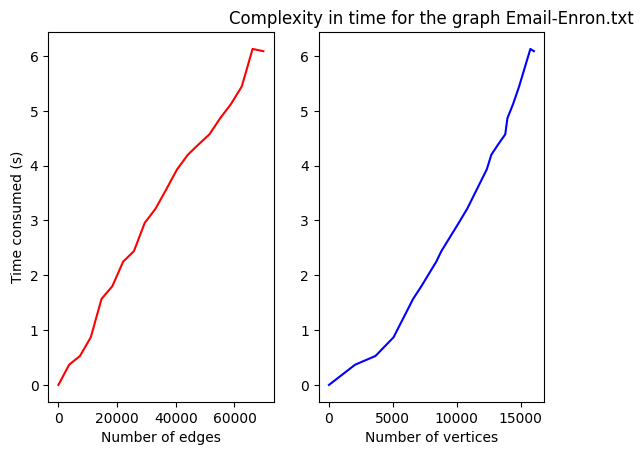

In [5]:
number_rows = getNumberRows("Email-Enron.txt")//5

print("Number of rows of the file deezer_europe_edges.csv:", number_rows)
n = 20

rows1 = []
vertex1= []
times1 = []

for i in range(n):
    start = t.time()
    nb_rows = int(number_rows*i/n)

    g = Graph2()
    g.fromCsvLimitRow("Email-Enron.txt",nb_rows, sep = '\t')
    g.findDensestSubgraph()
    print("Iteration",i,"/",n,"done",end='\r')
    end = t.time()
    times1.append(end-start)
    rows1.append(nb_rows)
    vertex1.append(g.nb_vertex)

ax1 = plt.subplot(121)
ax1.plot(rows1,times1, "r-")
ax1.set_xlabel('Number of edges')
ax1.set_ylabel('Time consumed (s)')

ax2 = plt.subplot(122, sharey=ax1)
ax2.plot(vertex1,times1,"b-")
ax2.set_xlabel('Number of vertices')
plt.title("Complexity in time for the graph Email-Enron.txt")
plt.show()

In that case, the complexity in time is linear for |E| and non-linear for |V|. Maybe it is in |V|.log(|V|)

Now, I fully open 4 graphs and I plot the time consumed for each one given its number of edges and vertices; The chosen ones are ```CA-GrQc.txt```, ```p2p-Gnutella08.txt```,```CA-AstroPh.txt```,```musae_FR_edges.csv```

CA-GrQc.txt done
p2p-Gnutella08.txt done
CA-AstroPh.txt done
musae_FR_edges.csv done


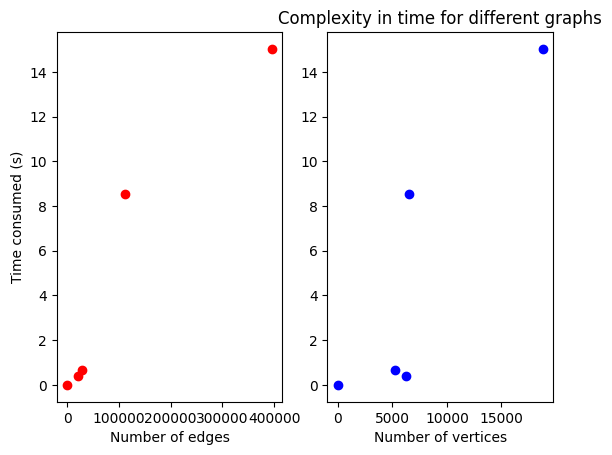

In [6]:
rows= []
vertex= []
times = []

vertex.append(0)
rows.append(0)
times.append(0)

start = t.time()
g = Graph2()
g.fromCsv("CA-GrQc.txt", sep = '\t')
g.findDensestSubgraph()
print("CA-GrQc.txt done")
end = t.time()
times.append(end-start)
rows.append(g.nb_edges)
vertex.append(g.nb_vertex)

start = t.time()
g = Graph2()
g.fromCsv("p2p-Gnutella08.txt", sep = '\t')
g.findDensestSubgraph()
print("p2p-Gnutella08.txt done")
end = t.time()
times.append(end-start)
rows.append(g.nb_edges)
vertex.append(g.nb_vertex)


start = t.time()
g = Graph2()
g.fromCsv("CA-AstroPh.txt", sep = '\t')
g.findDensestSubgraph()
print("CA-AstroPh.txt done")
end = t.time()
times.append(end-start)
rows.append(g.nb_edges)
vertex.append(g.nb_vertex)

start = t.time()
g = Graph2()
g.fromCsv("musae_FR_edges.csv", sep = ',')
g.findDensestSubgraph()
print("musae_FR_edges.csv done")
end = t.time()
times.append(end-start)
rows.append(g.nb_edges)
vertex.append(g.nb_vertex)



ax1 = plt.subplot(121)
ax1.plot(rows,times, "ro")
ax1.set_xlabel('Number of edges')
ax1.set_ylabel('Time consumed (s)')

ax2 = plt.subplot(122, sharey=ax1)
ax2.plot(vertex,times,"bo")
ax2.set_xlabel('Number of vertices')
plt.title("Complexity in time for different graphs")
plt.show()

## Now, I calculate the maximum density of our algorithm for different graphs

**```CA-GrQc.txt```**

Initial number of vertices: 5242
Initial density: 5.528424265547501

Number of vertices in the densest subgraph: 707
Final density: 12.71004243281471


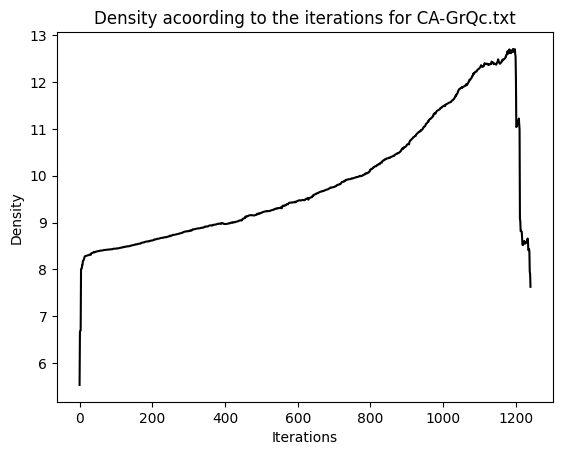

Selected Vertices: [13, 27, 45, 46, 88, 95, 185, 200, 214, 215, 309, 339, 351, 360, 408, 492, 523, 546, 570, 593, 773, 782, 787, 832, 930, 1008, 1023, 1074, 1092, 1281, 1292, 1293, 1427, 1497, 1549, 1556, 1563, 1613, 1653, 1660, 1672, 1738, 1832, 1858, 1908, 1981, 1985, 1989, 1995, 1997, 2047, 2054, 2073, 2116, 2144, 2185, 2212, 2215, 2249, 2250, 2304, 2338, 2388, 2409, 2449, 2457, 2503, 2530, 2535, 2621, 2623, 2741, 2754, 2774, 2784, 2785, 2952, 3055, 3063, 3113, 3206, 3283, 3362, 3372, 3377, 3387, 3388, 3522, 3524, 3534, 3595, 3632, 3651, 3652, 3653, 3655, 3682, 3716, 3719, 3750, 3754, 3766, 3812, 3814, 3818, 3820, 3824, 3877, 3939, 3996, 4051, 4081, 4106, 4110, 4164, 4199, 4286, 4288, 4354, 4355, 4364, 4493, 4511, 4512, 4513, 4554, 4630, 4639, 4703, 4704, 4743, 4748, 4755, 4777, 4793, 4834, 4958, 5065, 5067, 5131, 5156, 5172, 5181, 5210, 5211, 5212, 5412, 5435, 5468, 5477, 5478, 5503, 5511, 5571, 5601, 5621, 5629, 5667, 5668, 5738, 5957, 5960, 6012, 6077, 6170, 6179, 6218, 6222, 622

In [7]:
g = Graph2()
g.fromCsv("CA-GrQc.txt", sep = '\t')
print("Initial number of vertices:",g.nb_vertex)
vertices, maxDensity = g.findDensestSubgraph()
print("Initial density:",g.initialDensity)
print("")
print("Number of vertices in the densest subgraph:",len(vertices))
print("Final density:",g.maxDensity)

plt.plot(maxDensity,"k-")
plt.title("Density acoording to the iterations for CA-GrQc.txt")
plt.xlabel("Iterations")
plt.ylabel("Density")
plt.show()

print("Selected Vertices:",vertices)

```p2p-Gnutella08.txt```

Initial number of vertices: 6301
Initial density: 3.2974131090303125

Number of vertices in the densest subgraph: 438
Final density: 7.890410958904109


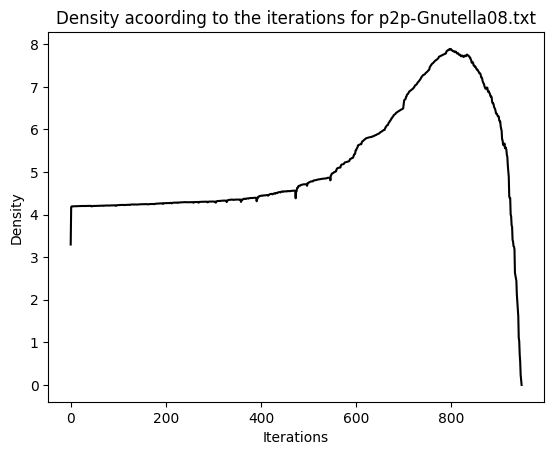

Selected Vertices: [3, 4, 5, 7, 8, 9, 15, 17, 30, 31, 34, 36, 99, 101, 113, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 132, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 155, 167, 170, 172, 173, 174, 175, 176, 177, 179, 180, 183, 238, 246, 247, 248, 249, 250, 251, 252, 264, 265, 266, 298, 299, 314, 323, 339, 343, 345, 352, 353, 357, 361, 366, 367, 368, 369, 371, 377, 378, 390, 391, 401, 409, 421, 422, 423, 424, 425, 426, 427, 434, 449, 485, 504, 505, 507, 557, 558, 559, 574, 586, 605, 646, 665, 666, 667, 697, 716, 717, 718, 720, 751, 753, 754, 762, 820, 845, 856, 909, 919, 924, 930, 937, 986, 989, 990, 1029, 1046, 1059, 1082, 1094, 1113, 1135, 1144, 1161, 1176, 1199, 1228, 1231, 1235, 1245, 1246, 1255, 1259, 1284, 1290, 1305, 1310, 1317, 1319, 1352, 1388, 1393, 1394, 1409, 1411, 1412, 1414, 1417, 1418, 1430, 1431, 1433, 1458, 1473, 1477, 1485, 1487, 1494, 1537, 1550, 1559, 1561, 1564, 1586, 1600, 1601, 1602, 1603, 1617, 1647, 1669, 1676, 1704, 1706, 1723, 1732, 1739, 1784, 1

In [8]:
g = Graph2()
g.fromCsv("p2p-Gnutella08.txt", sep = '\t')
print("Initial number of vertices:",g.nb_vertex)
vertices, maxDensity = g.findDensestSubgraph()
print("Initial density:",g.initialDensity)
print("")
print("Number of vertices in the densest subgraph:",len(vertices))
print("Final density:",g.maxDensity)

plt.plot(maxDensity,"k-")
plt.title("Density acoording to the iterations for p2p-Gnutella08.txt")
plt.xlabel("Iterations")
plt.ylabel("Density")
plt.show()

print("Selected Vertices:",vertices)

```CA-AstroPh.txt```

Initial number of vertices: 18772
Initial density: 21.1037715746857

Number of vertices in the densest subgraph: 2899
Final density: 47.140393239047945


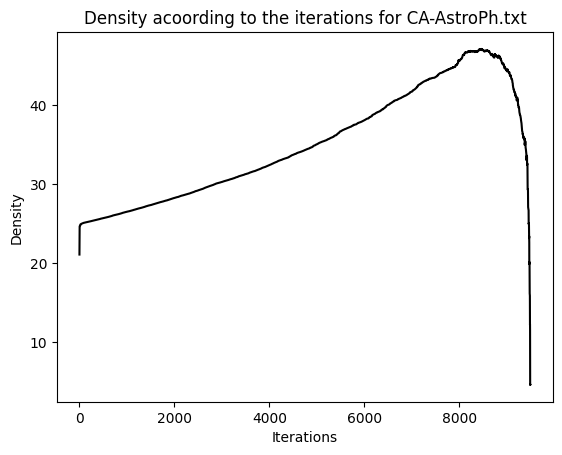

Selected Vertices: [30, 88, 114, 117, 229, 293, 347, 358, 385, 386, 461, 463, 465, 492, 494, 503, 506, 529, 535, 602, 603, 645, 722, 728, 749, 768, 784, 812, 822, 824, 837, 871, 874, 885, 916, 1086, 1155, 1158, 1186, 1188, 1218, 1324, 1356, 1399, 1438, 1447, 1625, 1663, 1664, 1677, 1690, 1713, 1776, 1821, 1917, 1949, 1950, 1969, 2094, 2115, 2158, 2166, 2211, 2329, 2392, 2417, 2444, 2478, 2486, 2515, 2545, 2588, 2633, 2682, 2736, 2743, 2758, 2803, 2839, 2924, 3270, 3365, 3377, 3420, 3421, 3543, 3547, 3582, 3607, 3634, 3677, 3717, 3721, 3905, 3907, 3952, 3964, 4024, 4032, 4044, 4065, 4074, 4077, 4173, 4239, 4275, 4469, 4471, 4507, 4540, 4636, 4679, 4713, 4753, 4786, 4787, 4799, 4893, 4903, 4908, 4917, 4959, 5019, 5034, 5216, 5233, 5335, 5453, 5638, 5665, 5674, 5710, 5866, 5899, 5978, 6000, 6002, 6058, 6078, 6165, 6167, 6173, 6256, 6288, 6345, 6358, 6364, 6417, 6468, 6506, 6541, 6616, 6713, 6729, 6790, 6831, 6837, 6908, 6936, 6947, 7026, 7072, 7083, 7205, 7264, 7439, 7522, 7687, 7829, 789

In [9]:
g = Graph2()
g.fromCsv("CA-AstroPh.txt", sep = '\t')
print("Initial number of vertices:",g.nb_vertex)
vertices, maxDensity = g.findDensestSubgraph()
print("Initial density:",g.initialDensity)
print("")
print("Number of vertices in the densest subgraph:",len(vertices))
print("Final density:",g.maxDensity)

plt.plot(maxDensity,"k-")
plt.title("Density acoording to the iterations for CA-AstroPh.txt")
plt.xlabel("Iterations")
plt.ylabel("Density")
plt.show()

print("Selected Vertices:",vertices)

In all the cases, we see tha the density increases then decreses according to the iterations. The maximum is the density subgraph found